In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from pandas_datareader import DataReader

In [4]:
from datetime import datetime

In [5]:
from __future__ import division

In [6]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [7]:
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

In [8]:
for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start,end)

In [9]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,130.302056,127.279367,128.852965,128.803557,1.048000e+08,128.374674
std,10.874507,11.195686,10.966954,11.103712,4.268626e+07,11.260282
min,110.190002,103.099998,104.540001,106.839996,4.639770e+07,106.157211
25%,122.059998,118.959999,120.500000,120.709999,7.649920e+07,120.145607
50%,128.710007,126.320000,127.779999,127.349998,9.435980e+07,127.159477
75%,136.389999,133.610001,135.580002,134.839996,1.201509e+08,134.358719
max,154.979996,152.399994,153.869995,153.119995,3.326072e+08,153.119995


<AxesSubplot:xlabel='Date'>

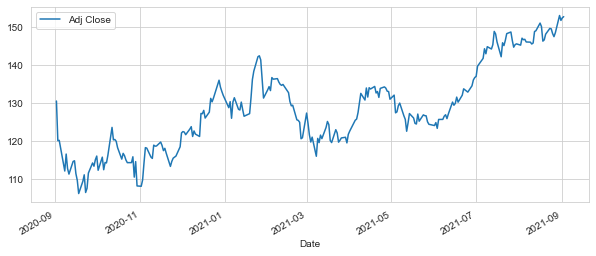

In [10]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

<AxesSubplot:xlabel='Date'>

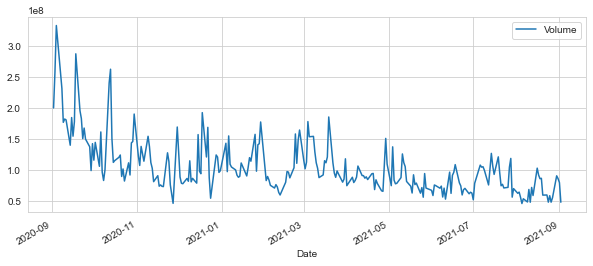

In [11]:
AAPL['Volume'].plot(legend = True, figsize = (10,4))

In [12]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = pd.Series.rolling(AAPL['Adj Close'],ma).mean()

<AxesSubplot:xlabel='Date'>

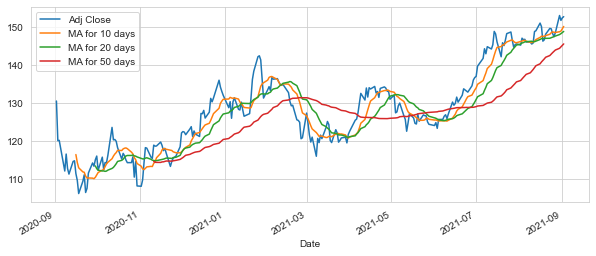

In [13]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots = False, figsize = (10,4))

<AxesSubplot:xlabel='Date'>

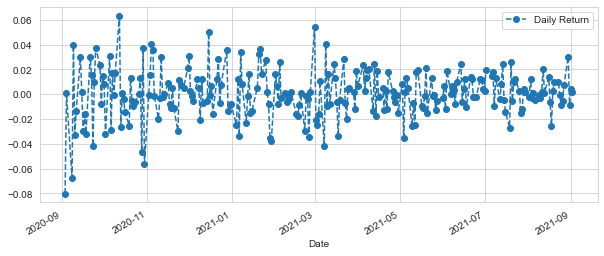

In [14]:
AAPL['Daily Return'] = AAPL ['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize = (10,4), legend = True, linestyle = '--', marker = 'o')

/home/apirl/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

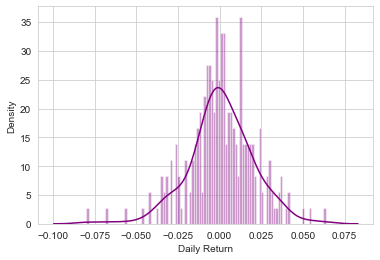

In [15]:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'purple')

<AxesSubplot:>

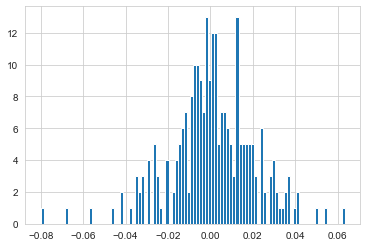

In [16]:
AAPL['Daily Return'].hist(bins = 100)

In [17]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [18]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-09-02,130.560257,1728.280029,229.543701,3531.449951
2020-09-03,120.107483,1641.839966,215.324188,3368.000000
2020-09-04,120.186981,1591.040039,212.301926,3294.620117
2020-09-08,112.098999,1532.390015,200.817307,3149.840088
2020-09-09,116.570236,1556.959961,209.368820,3268.610107


In [19]:
tech_rets = closing_df.pct_change()

In [20]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-09-02,NaN,NaN,NaN,NaN
2020-09-03,-0.080061,-0.050015,-0.061947,-0.046284
2020-09-04,0.000662,-0.030941,-0.014036,-0.021787
2020-09-08,-0.067295,-0.036863,-0.054096,-0.043944
2020-09-09,0.039887,0.016034,0.042584,0.037707


/home/apirl/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


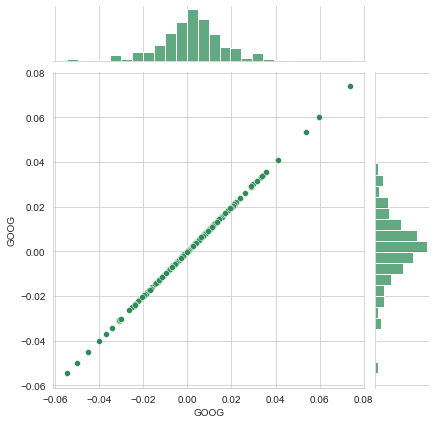

In [21]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind = 'scatter', color = 'seagreen')

/home/apirl/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


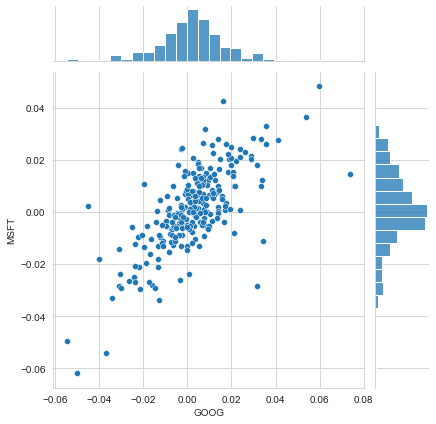

In [22]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind = 'scatter')

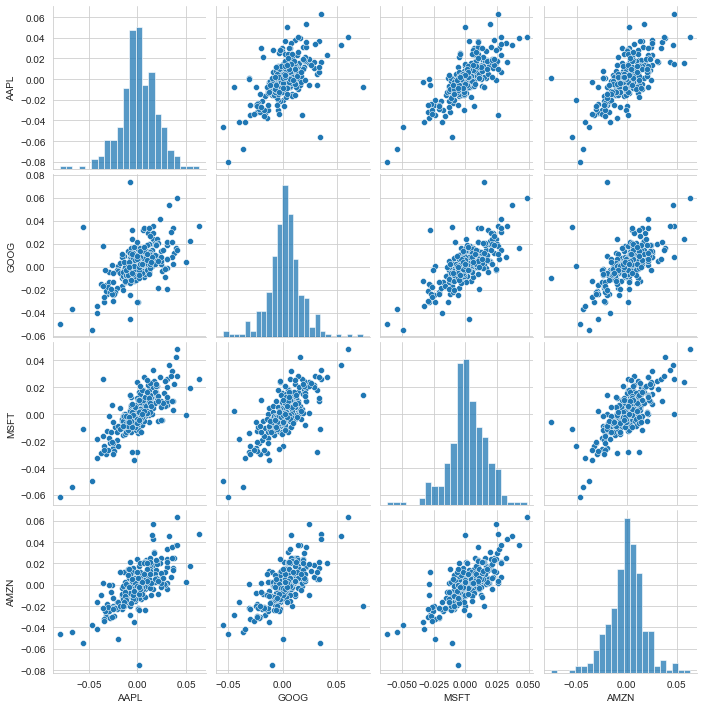

In [23]:
sns.pairplot(tech_rets.dropna())

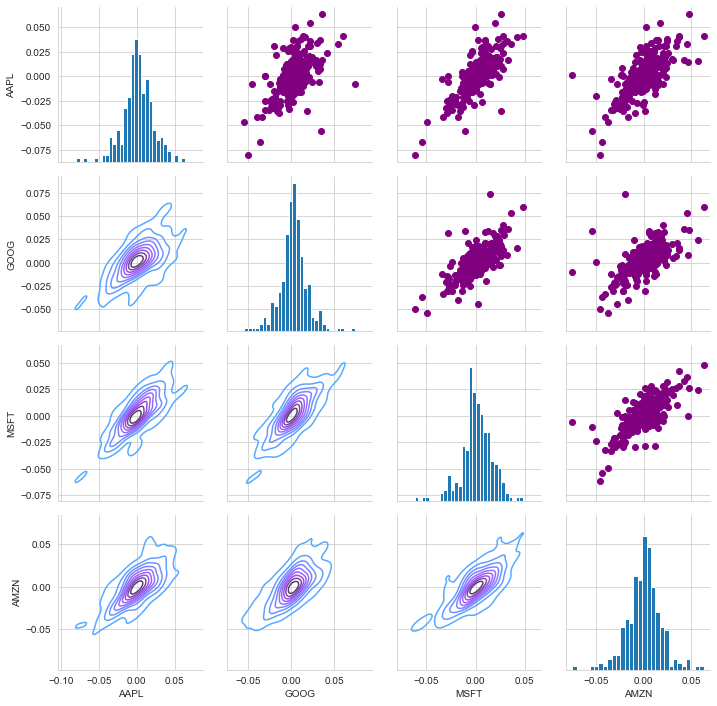

In [24]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter, color = 'purple')

returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')

returns_fig.map_diag(plt.hist, bins = 30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

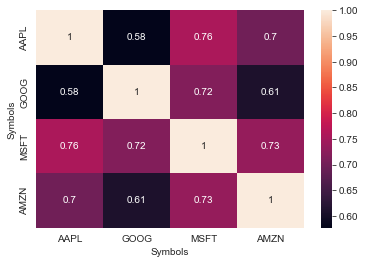

In [25]:
sns.heatmap(tech_rets.corr(), annot = True)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

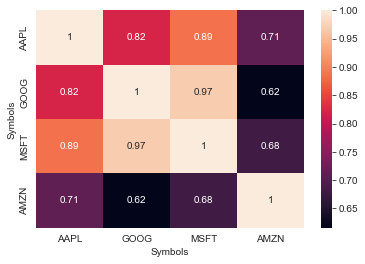

In [26]:
sns.heatmap(closing_df.corr(), annot = True)

In [27]:
rets = tech_rets.dropna()

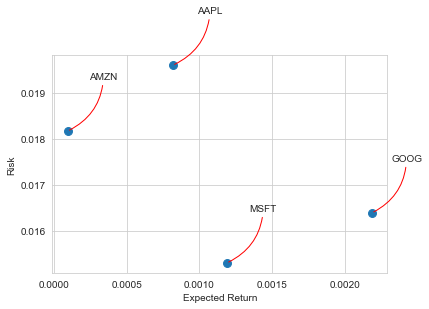

In [37]:
area = np.pi * 20
plt.scatter(rets.mean(), rets.std(), s = area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3, rad = -0.3', color = 'red') 
    )

/home/apirl/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

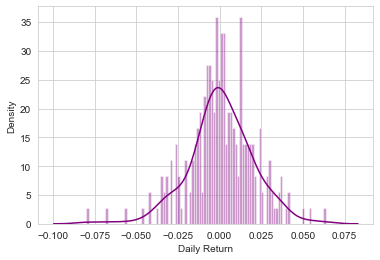

In [41]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

In [50]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-09-03,-0.080061,-0.050015,-0.061947,-0.046284
2020-09-04,0.000662,-0.030941,-0.014036,-0.021787
2020-09-08,-0.067295,-0.036863,-0.054096,-0.043944
2020-09-09,0.039887,0.016034,0.042584,0.037707
2020-09-10,-0.032646,-0.016018,-0.028018,-0.028605


In [52]:
rets['AAPL'].quantile(0.05)

-0.032444643441495544

In [55]:
days = 365
dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [57]:
def stock_monte_carlo(start_price, days, mu, sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in xrange(1, days):
        
        shock[x] = np.random.normal(loc=mu*dt, scale = sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))

    return price

In [59]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-09-02,1733.180054,1666.329956,1673.775024,1728.280029,2511200,1728.280029
2020-09-03,1709.713989,1615.060059,1709.713989,1641.839966,3107800,1641.839966
2020-09-04,1645.109985,1547.613037,1624.260010,1591.040039,2608600,1591.040039
2020-09-08,1563.864990,1528.010010,1533.510010,1532.390015,2610900,1532.390015
2020-09-09,1569.000000,1536.051025,1557.530029,1556.959961,1774700,1556.959961


In [60]:
start_price = GOOG['Open'].min('Date')

ValueError: No axis named Date for object type Series